In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('F:\Linux')
import illustris_python as il

def HistValAndBin(nums, bins, more=0, mask=0):
    if mask == 1:
        reMask = []

    val = []
    tmp = nums[nums < bins[1]]
    if mask == 1:
        reMask.append(nums < bins[1])
    val.append(len(tmp))

    for i in range(1,len(bins)-1):
        tmp = nums[(nums > bins[i]) & (nums <= bins[i+1])]
        val.append(len(tmp))
        if mask == 1:
            reMask.append((nums > bins[i]) & (nums <= bins[i+1]))

    if more == 1:
        tmp = nums[nums > bins[-1]]
        val.append(len(tmp))
        if mask == 1:
            reMask.append(nums > bins[-1])

    if mask == 0:
        return np.array(val)
    else:
        return np.array(val), np.array(reMask)

In [3]:
tng_barID = np.load('f:/Linux/localRUN/barredID_4WP_TNG.npy', allow_pickle=True)
tng_diskID = np.load('f:/Linux/localRUN/diskID_4WP.npy', allow_pickle=True)
tng_allDisk = np.load('f:/Linux/localRUN/tng_allDisk.npy', allow_pickle=True)
tng_smDisk = np.load('f:/Linux/localRUN/tng_smDisk.npy', allow_pickle=True)
tng_allbar = np.load('f:/Linux/localRUN/barredID_TNG.npy', allow_pickle=True)
#Stellar Particles
SP = il.func.loadSubhalos('TNG', 99, 'SubhaloLenType')[:, 4]
#Stellar Mass
sMass = il.func.loadSubhalos('TNG', 99, 'SubhaloMassType')[:, 4] / 0.6774
sMass = np.log10(sMass * 10 ** 10)
sMass[np.isinf(sMass)] = 0

il1_barID = np.load('f:/Linux/localRUN/barredID_il1.npy', allow_pickle=True)
il1_diskID = np.load('f:/Linux/localRUN/diskID_il1.npy', allow_pickle=True)
il1_smDisk = tng_smDisk = np.load('f:/Linux/localRUN/il1_smDisk.npy', allow_pickle=True)
il1_alldisk = np.load('f:/Linux/localRUN/il1_alldisk.npy', allow_pickle=True)
#Stellar Particles
il1_SP = il.func.loadSubhalos('il1', 135, 'SubhaloLenType')[:, 4]
#Stellar Mass
il1_sMass = il.func.loadSubhalos('il1', 135, 'SubhaloMassType')[:, 4] / 0.704
il1_sMass = np.log10(il1_sMass * 10 ** 10)
il1_sMass[np.isinf(il1_sMass)] = 0

dg16 = np.load('f:/Linux/local_result/bar fraction/Il1_DG16.npz')['dg16']
old_hist = np.load('f:/Linux/local_result/bar fraction/Il1_DG16.npz')['hist']
old_frac = np.load('f:/Linux/local_result/bar fraction/Il1_DG16.npz')['frac']

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


In [18]:
def totalBarFraction_V2():
    #Fig : 'TotalBarFraction.pdf'
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_xlabel(r'$log(M_*/M_\odot)$', fontsize=15)
    ax1.set_ylabel(r'Bar Fraction', fontsize=15)
    ax1.set_ylim(0, 0.92)
    ax1.set_xlim(10, 12)
    ax2 = ax1.twinx()
    ax2.set_ylabel('N', fontsize=15)
    ax2.set_ylim(1, 2000)

    bins = np.linspace(10, 12, 25)
    n_disk = HistValAndBin(sMass[tng_allDisk], bins, more=1)
    n_bar = HistValAndBin(sMass[tng_allbar], bins, more=1)

    il1_disk = HistValAndBin(il1_sMass[il1_diskID], bins, more=1)
    il1_bar = HistValAndBin(il1_sMass[il1_barID], bins, more=1)

    # ax2.plot(bins[2:], n_disk[2:], label='TNG-100 stellar mass function', ls='-.')
    n_bar[1:-6][-3]=5
    ax1.plot(bins[1:-6]+0.02, n_bar[1:-6] / n_disk[1:-6], marker='o', color='r', label='TNG-100 data')
    # ax1.scatter(bins[6:-7]+0.02, il1_bar[6:-7] / il1_disk[6:-7], marker='o', s=13,color='r',label='Illustris-1 data')
    ax1.plot(bins[:14]+0.02, dg16[:,1], marker='^', color='g', label='Diaz-Garcia+16')
    ax1.plot(np.ones(10)*np.median(sMass[tng_barID]), np.linspace(0,1000,10), color='darkorange', ls='dashed')      #label='Median of barred galaxies stellar mass'
    #ax1.text(np.median(sMass[tng_barID])-0.4, 0.95, 'Median of barred galaxies stellar mass')
    ax1.annotate(r'Median $M_*$ of bars',
                xy=(np.median(sMass[tng_barID]), 0.79),
                xytext=(np.median(sMass[tng_barID])-0.75, 0.85),
                fontsize=12,
                arrowprops=dict(arrowstyle="->", color="k", connectionstyle="arc3,rad=-0.3"))

    ax1.legend(loc=1, fontsize=11)

    ax2.bar(bins, n_disk, width=(bins[1] - bins[0])*0.9, align = 'edge', label='Stellar mass function', alpha = 0.65)
    ax2.set_yscale('log')
    plt.savefig('f:/Linux/result_v2/TotalBarFraction.pdf')

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


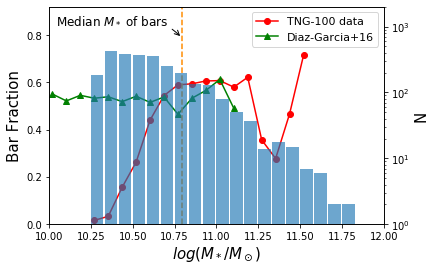

In [19]:
totalBarFraction_V2()

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


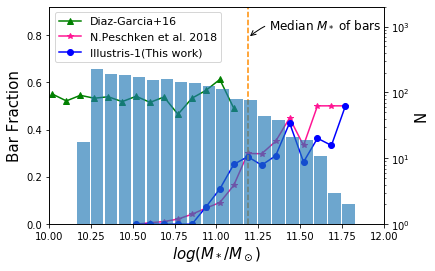

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_xlabel(r'$log(M_*/M_\odot)$', fontsize=15)
ax1.set_ylabel('Bar Fraction', fontsize=15)
ax1.set_ylim(0, 0.92)
ax1.set_xlim(10, 12)

ax2.set_ylabel('N', fontsize=15)
ax2.set_ylim(1, 2000)

bins = np.linspace(10, 12, 25)
il1_disk = HistValAndBin(il1_sMass[il1_alldisk], bins, more=1)
il1_bar = HistValAndBin(il1_sMass[il1_barID], bins, more=1)

ax1.plot(bins[:14] + 0.02, dg16[:, 1], marker='^', color='g', label='Diaz-Garcia+16')
ax1.plot(bins[6: 6 + 16] + 0.02, old_frac[:, 1], marker='*', color='deeppink', label='N.Peschken et al. 2018')
ax1.plot(bins[6: 6 + 16] + 0.02, (il1_bar / il1_disk)[6: 6 + 16], marker='o', color='b', label='Illustris-1(This work)')
ax1.plot(np.ones(10)*np.median(il1_sMass[il1_barID]), np.linspace(0,1000,10), ls='dashed', color='darkorange')
ax1.annotate(r'Median $M_*$ of bars',
            xy=(np.median(il1_sMass[il1_barID]), 0.79),
            xytext=(np.median(il1_sMass[il1_barID])+0.12, 0.83),
            fontsize=12,
            arrowprops=dict(arrowstyle="->", color="k", connectionstyle="arc3,rad=0.3"))

ax1.legend(loc=0, fontsize=11)

ax2.bar(bins[2:-3], il1_disk[2:-3], width=(bins[1] - bins[0]) * 0.9, align='edge', label='Illustris-1 disk galaxies', alpha=0.65)
ax2.set_yscale('log')
plt.savefig('f:/Linux/result_v2/il1_alldiskHist.pdf')

In [17]:
TotalBarFraction_eps()

NameError: name 'TotalBarFraction_eps' is not defined

In [4]:
il1_a2 = np.load('f:/Linux/localRUN/il1DiskA2withZ.npy',allow_pickle=1).item()
tng_a2 = np.load('f:/Linux/localRUN/tngDiskA2withZ.npy',allow_pickle=1).item()

bins = np.linspace(0.15, 0.55,9)
il1_rs = [135, 103, 85, 68]
tng_rs = [99, 67, 50, 33]


In [63]:
def il1_SUM_barFrationWithZ():
    il1_barFraction = {}
    for snap in il1_rs:
        barred = []
        for a2 in il1_a2[snap].values():
            if(a2 >= 0.15):
                barred.append(a2)
        nums = HistValAndBin(np.array(barred), bins, more=1)
        il1_barFraction[snap] = nums / len(il1_a2[snap].values())

    il1_tmp = {}
    for snap in il1_barFraction.keys():
        ll = []
        for i in range(len(il1_barFraction[snap])):
            ll.append(sum(il1_barFraction[snap][i:-1]))
        il1_tmp[snap] = ll

    plt.scatter(bins, il1_tmp[135], color='b', label = 'z=0', marker='.')
    plt.scatter(bins, il1_tmp[103], color='r', label = 'z=0.5', marker='.')
    plt.scatter(bins, il1_tmp[85], color='lime', label = 'z=1', marker='.')
    plt.scatter(bins, il1_tmp[68], color='blueviolet', label = 'z=2', marker='.')
    plt.xlabel('A2')
    plt.ylabel('Fraction')
    plt.xlim(0.1,0.56)
    plt.ylim(-0.02, 0.68)
    plt.title('Illustris-1')
    plt.legend()
    plt.savefig('F:/Linux/local_result/bar fraction/il1_SUM_barFrationWithZ.pdf')

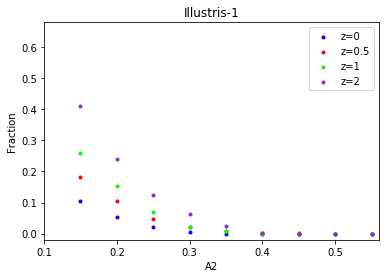

In [64]:
il1_SUM_barFrationWithZ()

In [65]:
def TNG_SUM_barFrationWithZ():
    tng_barFraction = {}
    for snap in tng_rs:
        barred = []
        for a2 in tng_a2[snap].values():
            if(a2 >= 0.15):
                barred.append(a2)
        nums = HistValAndBin(np.array(barred), bins, more=1)
        tng_barFraction[snap] = nums / len(tng_a2[snap].values())
    
    tng_tmp = {}
    for snap in tng_barFraction.keys():
        ll = []
        for i in range(len(tng_barFraction[snap])):
            ll.append(sum(tng_barFraction[snap][i:-1]))
        tng_tmp[snap] = ll
    
    plt.scatter(bins, tng_tmp[99], color='b', label = 'z = 0', marker='.')
    plt.scatter(bins, tng_tmp[67], color='r', label = 'z = 0.5', marker='.')
    plt.scatter(bins, tng_tmp[50], color='lime', label = 'z = 1', marker='.')
    plt.scatter(bins, tng_tmp[33], color='blueviolet', label = 'z = 2', marker='.')
    plt.xlabel('A2')
    plt.ylabel('Fraction')
    plt.xlim(0.1,0.56)
    plt.ylim(-0.02, 0.68)
    plt.title('TNG-100')
    plt.legend()
    plt.savefig('F:/Linux/local_result/bar fraction/TNG_SUM_barFrationWithZ.pdf')

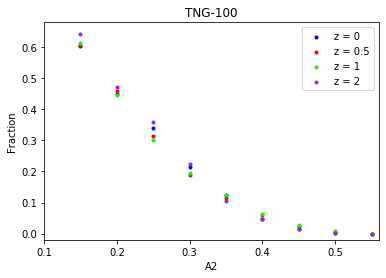

In [66]:
TNG_SUM_barFrationWithZ()

In [6]:
tng_sPtcl = {}
for snap in tng_rs:
    tng_sPtcl[snap] = il.func.loadSubhalos('TNG', snap, 'SubhaloLenType')[:, 4]

In [ ]:
big_disk = []
sml_disk = []
for haloID in tng_diskID:
    if tng_sPtcl[haloID] < 100000:
        sml_disk.append(haloID)
    else:
        big_disk.append(haloID)
big_disk = np.array(big_disk)
sml_disk = np.array(sml_disk)

In [11]:
tng_a2[99]

{3: 0.1939982701018245,
 6: 0.18079634074501721,
 10: 0.13100411357834554,
 12: 0.1568178666333804,
 16: 0.2766781912452642,
 18: 0.25317475434854797,
 20: 0.0614873606086755,
 22: 0.2430230121082104,
 26: 0.07382499651371698,
 27: 0.15117494381262855,
 30: 0.44396836518812294,
 32: 0.029184614304550698,
 33: 0.05885532776032561,
 35: 0.46723814042157846,
 41: 0.21404027896882447,
 17194: 0.2982153432621847,
 17197: 0.3537150315966326,
 17200: 0.11205708443472649,
 17204: 0.2882329338838799,
 17205: 0.15138640902533898,
 17211: 0.07457921216365518,
 17218: 0.16182187528542305,
 17223: 0.25462507352632974,
 31343: 0.12307206273397016,
 31347: 0.3885269640696741,
 31348: 0.07832674019876093,
 31349: 0.250966505112462,
 31350: 0.13800229788719398,
 31351: 0.18067798429961973,
 31356: 0.1987928929080322,
 31357: 0.17239172815061404,
 31358: 0.3640578469500687,
 31362: 0.06165056215850453,
 41585: 0.13587944783094016,
 41588: 0.09452834512469062,
 41589: 0.08561543996140614,
 41590: 0.05053

In [28]:
big_barFraction = {}
big_subID = {}
for snap in tng_rs:
    barred = []
    ids = []
    for subID in tng_a2[snap].keys():
        if(tng_sPtcl[snap][subID] >= 100000):
            ids.append(subID)
            if(tng_a2[snap][subID] >= 0.15):
                barred.append(tng_a2[snap][subID])
                
    nums = countInBins(np.array(barred), bins)
    big_barFraction[snap] = nums / len(ids)
    big_subID[snap] = ids
    print(len(ids), len(barred))

big_tmp = {}
for snap in big_barFraction.keys():
    ll = []
    for i in range(len(big_barFraction[snap])):
        ll.append(sum(big_barFraction[snap][i:-1]))
    big_tmp[snap] = ll
    

265 155
223 146
130 82
71 46


In [29]:
nums

array([13,  7, 11,  7,  2,  4,  2,  0,  0])

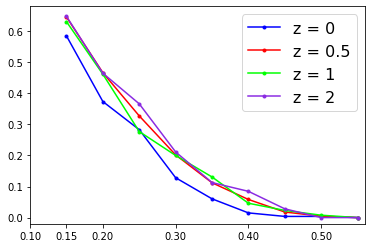

In [24]:
plt.plot(bins, big_tmp[99], color='b', label = 'z = 0', marker='.')
plt.plot(bins, big_tmp[67], color='r', label = 'z = 0.5', marker='.')
plt.plot(bins, big_tmp[50], color='lime', label = 'z = 1', marker='.')
plt.plot(bins, big_tmp[33], color='blueviolet', label = 'z = 2', marker='.')
plt.xlim(0.1,0.56)
plt.ylim(-0.02, 0.68)
plt.xticks([0.1, 0.15, 0.2,0.3,0.4,0.5])
plt.legend(fontsize=16)

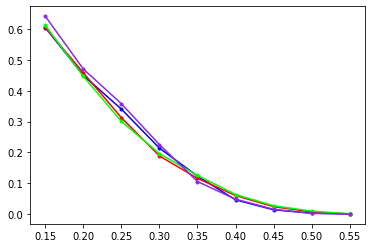

In [12]:
tng_barFraction = {}
for snap in tng_rs:
    barred = []
    for subID in tng_a2[snap].keys():
        if(tng_a2[snap][subID] >= 0.15 and tng_sPtcl[snap][subID] >= 100000):
            barred.append(tng_a2[snap][subID])
    
    nums = countInBins(np.array(barred), bins)
    print()
    tng_barFraction[snap] = nums / len(tng_a2[snap].values())

tng_tmp = {}
for snap in tng_barFraction.keys():
    ll = []
    for i in range(len(tng_barFraction[snap])):
        ll.append(sum(tng_barFraction[snap][i:-1]))
    tng_tmp[snap] = ll

plt.plot(bins, tng_tmp[99], color='b', label = 'z = 0', marker='.')
plt.plot(bins, tng_tmp[67], color='r', label = 'z = 0.5', marker='.')
plt.plot(bins, tng_tmp[50], color='lime', label = 'z = 1', marker='.')
plt.plot(bins, tng_tmp[33], color='blueviolet', label = 'z = 2', marker='.')

265 155
223 146
130 82
71 46


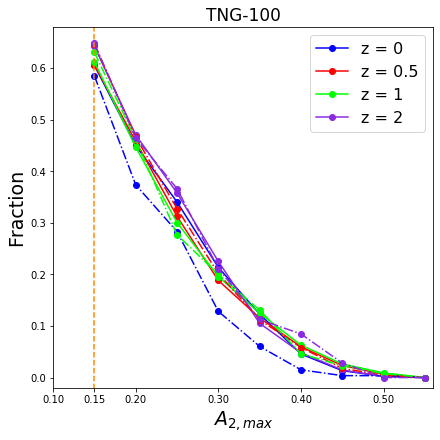

In [7]:
# fig, ax = plt.subplots(1,2, sharex=True, squeeze =True, sharey=True, figsize=(11,5), linewidth=0.01)
fig = plt.figure(figsize=(6,6), constrained_layout=True)
ax = fig.add_subplot(111)

#-----------------------TNG----------------
tng_barFraction = {}
for snap in tng_rs:
    barred = []
    for a2 in tng_a2[snap].values():
        if(a2 >= 0.15):
            barred.append(a2)
    nums = countInBins(np.array(barred), bins)
    tng_barFraction[snap] = nums / len(tng_a2[snap].values())

tng_tmp = {}
for snap in tng_barFraction.keys():
    ll = []
    for i in range(len(tng_barFraction[snap])):
        ll.append(sum(tng_barFraction[snap][i:-1]))
    tng_tmp[snap] = ll

ax.plot(bins, tng_tmp[99], color='b', label = 'z = 0', marker='o')
ax.plot(bins, tng_tmp[67], color='r', label = 'z = 0.5', marker='o')
ax.plot(bins, tng_tmp[50], color='lime', label = 'z = 1', marker='o')
ax.plot(bins, tng_tmp[33], color='blueviolet', label = 'z = 2', marker='o')

#------------------------bigHalos-------------------------
big_barFraction = {}
big_subID = {}
for snap in tng_rs:
    barred = []
    ids = []
    for subID in tng_a2[snap].keys():
        if(tng_sPtcl[snap][subID] >= 100000):
            ids.append(subID)
            if(tng_a2[snap][subID] >= 0.15):
                barred.append(tng_a2[snap][subID])
                
    nums = countInBins(np.array(barred), bins)
    big_barFraction[snap] = nums / len(ids)
    big_subID[snap] = ids
    print(len(ids), len(barred))

big_tmp = {}
for snap in big_barFraction.keys():
    ll = []
    for i in range(len(big_barFraction[snap])):
        ll.append(sum(big_barFraction[snap][i:-1]))
    big_tmp[snap] = ll

ax.plot(bins, big_tmp[99], color='b', marker='o', ls='-.')
ax.plot(bins, big_tmp[67], color='r', marker='o', ls='-.')
ax.plot(bins, big_tmp[50], color='lime', marker='o', ls='-.')
ax.plot(bins, big_tmp[33], color='blueviolet', marker='o', ls='-.')



ax.set_xlabel(r'$A_{2,max}$', fontsize=19)
ax.set_ylabel('Fraction', fontsize=19)
ax.set_xlim(0.1,0.56)
ax.set_ylim(-0.02, 0.68)

ax.plot(np.ones(10)*0.15, np.linspace(-0.1,0.7,10), c='darkorange', ls='dashed')

ax.set_title('TNG-100', fontsize=17)
ax.set_xticks([0.1, 0.15, 0.2,0.3,0.4,0.5])
ax.legend(fontsize=16)

plt.savefig('f:/Linux/local_result/bar fraction/tng_bfWithZ.pdf')

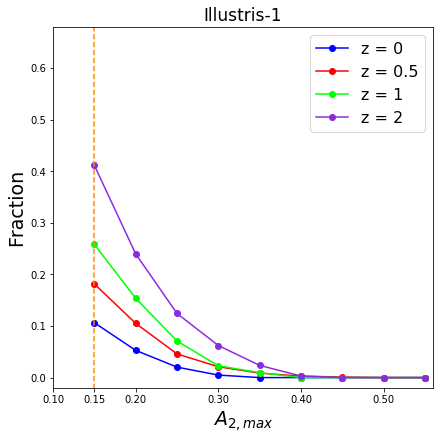

In [8]:
fig = plt.figure(figsize=(6,6), constrained_layout=True)
ax = fig.add_subplot(111)


il1_barFraction = {}
for snap in il1_rs:
    barred = []
    for a2 in il1_a2[snap].values():
        if(a2 >= 0.15):
            barred.append(a2)
    nums = countInBins(np.array(barred), bins)
    il1_barFraction[snap] = nums / len(il1_a2[snap].values())

il1_tmp = {}
for snap in il1_barFraction.keys():
    ll = []
    for i in range(len(il1_barFraction[snap])):
        ll.append(sum(il1_barFraction[snap][i:-1]))
    il1_tmp[snap] = ll

ax.plot(bins, il1_tmp[135], color='b', label = 'z = 0', marker='o')
ax.plot(bins, il1_tmp[103], color='r', label = 'z = 0.5', marker='o')
ax.plot(bins, il1_tmp[85], color='lime', label = 'z = 1', marker='o')
ax.plot(bins, il1_tmp[68], color='blueviolet', label = 'z = 2', marker='o')

ax.set_xlabel(r'$A_{2,max}$', fontsize=19)
ax.set_ylabel('Fraction', fontsize=19)
ax.set_xlim(0.1,0.56)
ax.set_ylim(-0.02, 0.68)

ax.plot(np.ones(10)*0.15, np.linspace(-0.1,0.7,10), c='darkorange', ls='dashed')


ax.set_title('Illustris-1', fontsize=17)
ax.set_xticks([0.1, 0.15, 0.2,0.3,0.4,0.5])
ax.legend(fontsize=16)
plt.savefig('f:/Linux/local_result/bar fraction/il1_bfWithZ.pdf')